#TELECOM X _ SEGUNDA PARTE

🧠 Objetivos del Desafío

*   Preparar los datos para el modelado (tratamiento, codificación, normalización).
*   Realizar análisis de correlación y selección de variables.
*   Entrenar dos o más modelos de clasificación.
*   Evaluar el rendimiento de los modelos con métricas.
*   Interpretar los resultados, incluyendo la importancia de las variables.
*   Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#PAQUETERIAS

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#🛠️Preparación de los Datos

##Extraccion del archivo tratado

In [29]:
#datos='https://raw.githubusercontent.com/Gdelangel/GDAL_TelecomX/refs/heads/main/df_final_telecomX.csv'
datos='https://raw.githubusercontent.com/Gdelangel/GDAL_TelecomX/refs/heads/main/df_final.csv'
datos=pd.read_csv(datos)
datos.head()
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


##Eliminacion de columnas Irrelevantes

In [30]:
#Unica columna que no representa ningun valor para el modelado es ID
datos=datos.drop(columns='customerID')
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

##Verificación de la Proporción de Cancelación (Churn)

In [31]:
xIn=datos.drop(columns='Churn')
yOut=datos['Churn']

In [32]:
umbral = 0.70
columnas_a_eliminar = []

for columna in datos.columns:
    if datos[columna].nunique() <= 2 or datos[columna].dtype == 'object':
        frecuencia_max = datos[columna].value_counts(normalize=True).max()
        if frecuencia_max > umbral:
            columnas_a_eliminar.append(columna)
            print(f"Columna '{columna}' tiene {frecuencia_max*100:.2f}% en una categoría.")
if columnas_a_eliminar:
    print(f"\nColumnas a eliminar por desbalance (>{umbral*100}% en una categoría):")
    print(columnas_a_eliminar)
else:
    print(f"No se encontraron columnas con desbalance >{umbral*100}%.")

Columna 'Churn' tiene 74.28% en una categoría.
Columna 'SeniorCitizen' tiene 83.73% en una categoría.
Columna 'PhoneService' tiene 90.27% en una categoría.
Columna 'OnlineSecurity' tiene 71.40% en una categoría.
Columna 'TechSupport' tiene 71.05% en una categoría.

Columnas a eliminar por desbalance (>70.0% en una categoría):
['Churn', 'SeniorCitizen', 'PhoneService', 'OnlineSecurity', 'TechSupport']


In [34]:
#Datos irrelevantes para el modelo <90%
datos=datos.drop(columns='PhoneService')
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [35]:
# Example of renaming a column
#datos.rename(columns={'customer.gender': 'gender'}, inplace=True)
#datos.rename(columns={'customer.SeniorCitizen': 'SeniorCitizen'}, inplace=True)
#datos.rename(columns={'customer.Partner': 'Partner'}, inplace=True)
#datos.rename(columns={'customer.Dependents': 'Dependents'}, inplace=True)
#datos.rename(columns={'customer.tenure': 'tenure'}, inplace=True)
#datos.rename(columns={'phone.MultipleLines': 'MultipleLines'}, inplace=True)
#datos.rename(columns={'internet.InternetService': 'InternetService'}, inplace=True)
#datos.rename(columns={'internet.OnlineSecurity': 'OnlineSecurity'}, inplace=True)
#datos.rename(columns={'internet.OnlineBackup': 'OnlineBackup'}, inplace=True)
#datos.rename(columns={'internet.DeviceProtection': 'DeviceProtection'}, inplace=True)
#datos.rename(columns={'internet.TechSupport': 'TechSupport'}, inplace=True)
#datos.rename(columns={'internet.StreamingTV': 'StreamingTV'}, inplace=True)
#datos.rename(columns={'internet.StreamingMovies': 'StreamingMovies'}, inplace=True)
#datos.rename(columns={'account.Contract': 'Contract'}, inplace=True)
#datos.rename(columns={'account.PaperlessBilling': 'PaperlessBilling'}, inplace=True)
#datos.rename(columns={'account.PaymentMethod': 'PaymentMethod'}, inplace=True)
#datos.rename(columns={'account.Charges.Monthly': 'Charges.Monthly'}, inplace=True)
#datos.rename(columns={'account.Charges.Total': 'Charges.Total'}, inplace=True)

# Display the updated columns to show the change
print(datos.columns)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


##Encoding

In [36]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   MultipleLines     7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   int64  
 9   OnlineBackup      7267 non-null   int64  
 10  DeviceProtection  7267 non-null   int64  
 11  TechSupport       7267 non-null   int64  
 12  StreamingTV       7267 non-null   int64  
 13  StreamingMovies   7267 non-null   int64  
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   int64  
 16  PaymentMethod     7267 non-null   object 


In [37]:
categoricas = datos.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", categoricas)

Variables categóricas: ['gender', 'InternetService', 'Contract', 'PaymentMethod']


In [38]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas=xIn.columns
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),categoricas),
    remainder='passthrough',
    sparse_threshold=0
)
x=one_hot_encoder.fit_transform(xIn)
one_hot_encoder.get_feature_names_out(columnas)
xIn=pd.DataFrame(x, columns=one_hot_encoder.get_feature_names_out(columnas))

In [39]:
xIn.columns

Index(['onehotencoder__gender_Male', 'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__SeniorCitizen',
       'remainder__Partner', 'remainder__Dependents', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__Charges.Monthly',
       'remainder__Charges.Total', 'remai

In [40]:
xIn

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.16
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,1.97
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.43
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.22
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.81
7263,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.80
7264,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.65
7265,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.23


In [41]:
yOut

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


##Balanceo de Clases

In [42]:
datos.Churn.value_counts()

,count
Churn,
0,5398
1,1869


In [43]:
xIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__gender_Male                              7267 non-null   float64
 1   onehotencoder__InternetService_DSL                      7267 non-null   float64
 2   onehotencoder__InternetService_Fiber optic              7267 non-null   float64
 3   onehotencoder__InternetService_No                       7267 non-null   float64
 4   onehotencoder__Contract_Month-to-month                  7267 non-null   float64
 5   onehotencoder__Contract_One year                        7267 non-null   float64
 6   onehotencoder__Contract_Two year                        7267 non-null   float64
 7   onehotencoder__PaymentMethod_Bank transfer (automatic)  7267 non-null   float64
 8   onehotencoder__PaymentMethod_Credit ca

In [44]:
over_sampling=SMOTE()

In [45]:
x_over,y_over=over_sampling.fit_resample(xIn,yOut)

In [46]:
y_over.value_counts(normalize=False)

,count
Churn,
0,5398
1,5398


#🎯Correlacion y Seleccion de **Variables**

##Analisis de correlacion

In [47]:
datosOneHotEncoder=pd.concat([x_over.reset_index(drop=True), y_over.reset_index(drop=True)], axis=1)
datosOneHotEncoder

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias,Churn
0,0.000000,1.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,1.0,0.000000,1.000000,1.000000,0.000000,1.000000,65.600000,593.300000,2.160000,0
1,1.000000,1.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,59.900000,542.400000,1.970000,0
2,1.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,73.900000,280.850000,2.430000,1
3,1.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,...,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,98.000000,1237.850000,3.220000,1
4,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,83.900000,267.400000,2.760000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,0.238870,0.000000,1.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,79.322474,304.165197,2.609555,1
10792,0.510837,0.000000,1.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,...,0.0,0.510837,0.000000,1.000000,0.000000,1.000000,85.191493,589.830191,2.798793,1
10793,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.000000,0.327248,0.672752,...,0.0,0.672752,0.327248,0.000000,0.327248,0.327248,77.999727,431.416567,2.561082,1
10794,0.000000,0.784725,0.0,0.215275,1.0,0.0,0.0,0.215275,0.000000,0.784725,...,0.0,0.000000,0.000000,0.000000,0.000000,0.784725,23.696539,86.363198,0.776320,1


In [48]:
datosOHE=datosOneHotEncoder.corr()
datosOHE['Churn']

,Churn
onehotencoder__gender_Male,-0.004096
onehotencoder__InternetService_DSL,-0.149141
onehotencoder__InternetService_Fiber optic,0.352041
onehotencoder__InternetService_No,-0.286621
onehotencoder__Contract_Month-to-month,0.486663
onehotencoder__Contract_One year,-0.225887
onehotencoder__Contract_Two year,-0.386768
onehotencoder__PaymentMethod_Bank transfer (automatic),-0.145826
onehotencoder__PaymentMethod_Credit card (automatic),-0.170433
onehotencoder__PaymentMethod_Electronic check,0.346340


In [50]:
variables_correlacionadas = [
    "onehotencoder__Contract_Month-to-month",       # Positiva (0.48)
    "remainder__tenure",                           # Negativa (-0.40)
    "onehotencoder__Contract_Two year",            # Negativa (-0.39)
    "onehotencoder__InternetService_Fiber optic",  # Positiva (0.36)
    "onehotencoder__PaymentMethod_Electronic check", # Positiva (0.34)
    "onehotencoder__InternetService_No",           # Negativa (-0.29)
    "onehotencoder__Contract_One year",            # Negativa (-0.22)
    "remainder__Charges.Monthly",                  # Positiva (0.24)
    "remainder__Cuentas_Diarias",                  # Positiva (0.24)
    "remainder__Dependents",                       # Negativa (-0.21)
    "remainder__TechSupport",                      # Negativa (-0.21)
    "remainder__OnlineSecurity",                   # Negativa (-0.21)
    "remainder__PaperlessBilling",                 # Positiva (0.23)
    "remainder__Partner",                          # Negativa (-0.18)
    "remainder__SeniorCitizen"                     # Positiva (0.17)
]

## Analisis Dirigido

In [51]:
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return int(ancho)

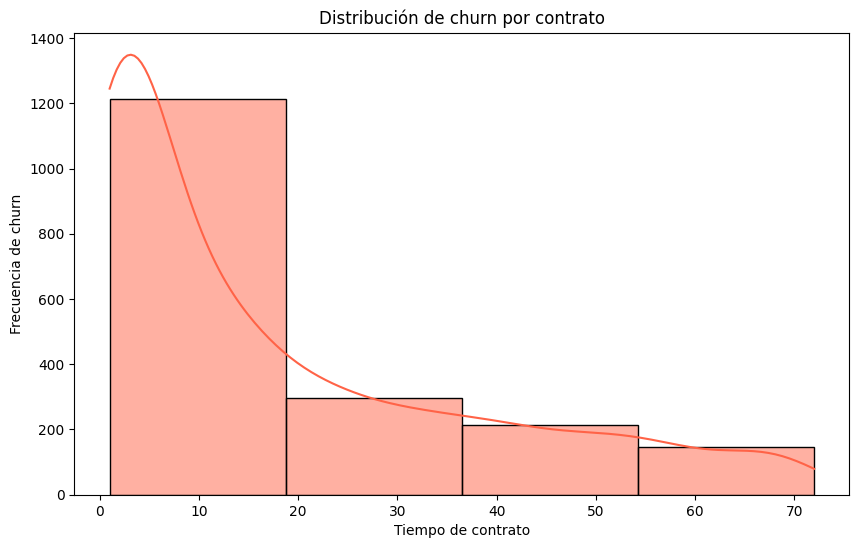

In [55]:
datos_churn = datos[datos['Churn'] == 1]

bin=ancho_bin(datos_churn,'tenure')
plt.figure(figsize=(10, 6))
sns.histplot(data=datos_churn, x='tenure', kde=True, bins=bin, color='tomato')
plt.title("Distribución de churn por contrato")
plt.xlabel("Tiempo de contrato")
plt.ylabel("Frecuencia de churn")
plt.show()

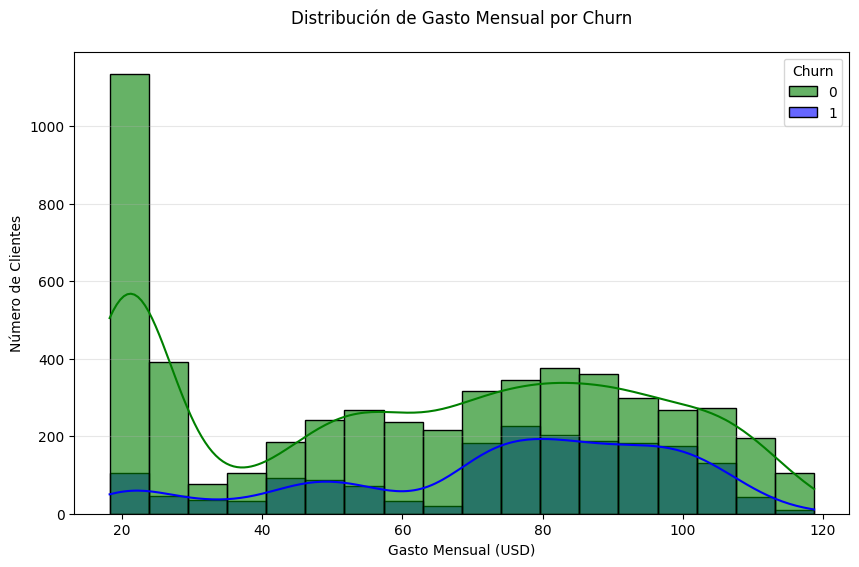

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=datos,
    x='Charges.Monthly',
    hue='Churn',
    kde=True,
    bins='auto',
    palette={0: 'green', 1: 'blue'},
    alpha=0.6,
    multiple='layer'
)
plt.title("Distribución de Gasto Mensual por Churn", pad=20)
plt.xlabel("Gasto Mensual (USD)")
plt.ylabel("Número de Clientes")
plt.grid(axis='y', alpha=0.3)
plt.show()

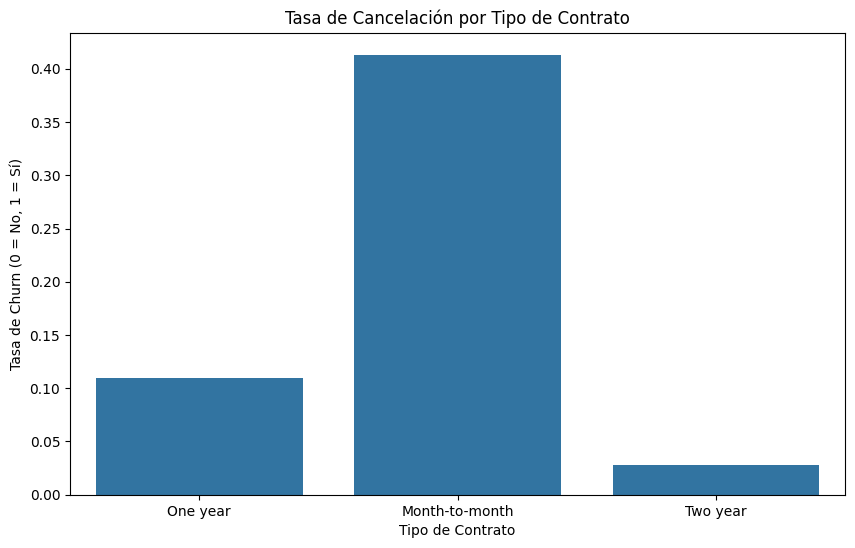

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn', data=datos, errorbar=None)
plt.title("Tasa de Cancelación por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Tasa de Churn (0 = No, 1 = Sí)")
plt.show()

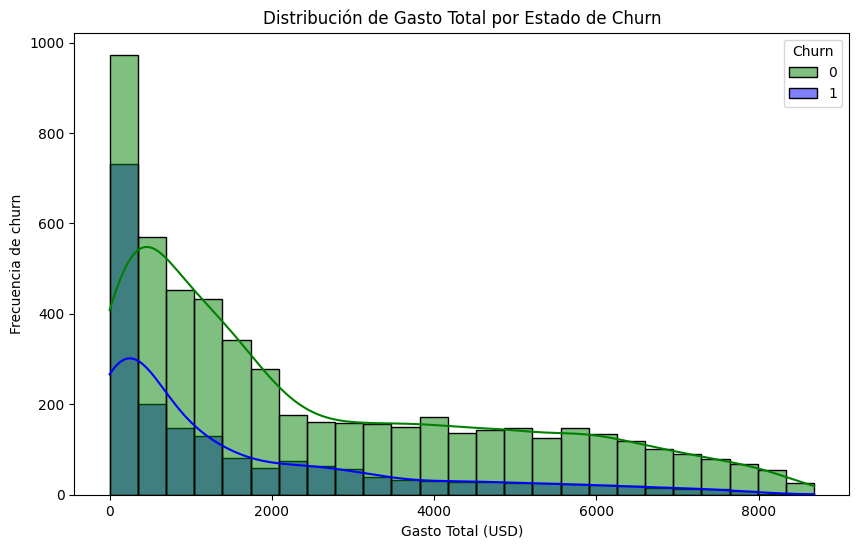

In [69]:
bin=ancho_bin(datos,'Charges.Total')
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='Charges.Total', hue='Churn', kde=True, bins='auto',palette={0: 'green', 1: 'blue'})
plt.title("Distribución de Gasto Total por Estado de Churn")
plt.xlabel("Gasto Total (USD)")
plt.ylabel("Frecuencia de churn")
plt.show()

#🤖 Modelado Predictivo

##Separacion de Datos

In [70]:
x_over.shape

(10796, 27)

In [71]:
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y_over)
y

array([0, 0, 1, ..., 1, 1, 1])

##Creacion de Modelos

##Modelo Dummy

In [74]:
x_trainDummy, x_testDummy, y_trainDummy, y_testDummy = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

In [75]:
baseline=DummyClassifier()
baseline.fit(x_trainDummy, y_trainDummy)


baseline.score(x_testDummy, y_testDummy)

0.5

###Modelo Random Forest Classifier

In [72]:
x_trainRFC, x_testRFC, y_trainRFC, y_testRFC = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

In [73]:
modeloRFC = RandomForestClassifier(random_state=42,max_depth=10)
modeloRFC.fit(x_trainRFC, y_trainRFC)
y_pred = modeloRFC.predict(x_testRFC)
modeloRFC.score(x_testRFC, y_testRFC)

0.8629629629629629

###Modelo DecisionTreeClassifier

In [76]:
x_trainDTC, x_testDTC, y_trainDTC, y_testDTC = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

In [77]:
arbol=DecisionTreeClassifier(random_state=42, max_depth=5)
arbol.fit(x_trainDTC, y_trainDTC)

arbol.score(x_testDTC, y_testDTC)

0.7962962962962963

In [78]:
arbol.score(x_trainDTC, y_trainDTC)

0.8156553960166744

##Evaluacion de los Modelos


---- Rendimiento en TEST de Dummy ----
Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1080
           1       0.00      0.00      0.00      1080

    accuracy                           0.50      2160
   macro avg       0.25      0.50      0.33      2160
weighted avg       0.25      0.50      0.33      2160

Matriz de confusión:
 [[1080    0]
 [1080    0]]

---- Rendimiento en TRAIN ----
Accuracy: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


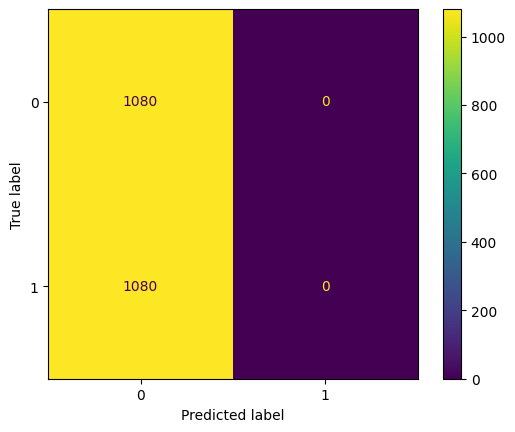

In [79]:
y_pred_dummy = baseline.predict(x_testDummy)

print("\n---- Rendimiento en TEST de Dummy ----")
print(f"Accuracy: {accuracy_score(y_testDummy, y_pred_dummy):.4f}")
print(classification_report(y_testDummy, y_pred_dummy))
print("Matriz de confusión:\n", confusion_matrix(y_testDummy, y_pred_dummy))

y_pred_train = baseline.predict(x_trainDummy)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainDummy, y_pred_train):.4f}")
ConfusionMatrixDisplay.from_predictions(y_testDummy,y_pred_dummy)


---- Rendimiento en TEST de Random Forest Classifier ----
Accuracy: 0.8630
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1080
           1       0.85      0.88      0.87      1080

    accuracy                           0.86      2160
   macro avg       0.86      0.86      0.86      2160
weighted avg       0.86      0.86      0.86      2160

Matriz de confusión:
 [[912 168]
 [128 952]]

---- Rendimiento en TRAIN ----
Accuracy: 0.8983


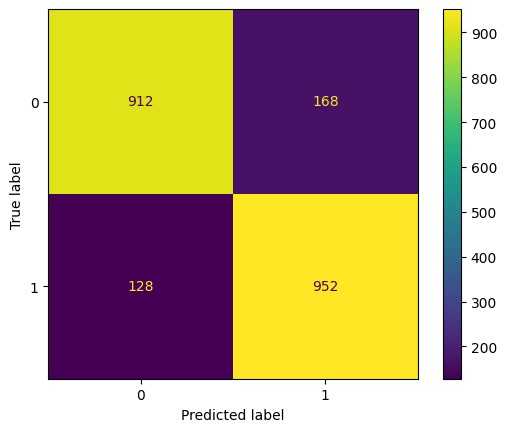

In [81]:
y_pred = modeloRFC.predict(x_testRFC)

print("\n---- Rendimiento en TEST de Random Forest Classifier ----")
print(f"Accuracy: {accuracy_score(y_testRFC, y_pred):.4f}")
print(classification_report(y_testRFC, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_testRFC, y_pred))

# Métricas en TRAIN (para diagnosticar overfitting)
y_pred_train = modeloRFC.predict(x_trainRFC)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainRFC, y_pred_train):.4f}")

ConfusionMatrixDisplay.from_predictions(y_testRFC,y_pred)


---- Rendimiento en TEST de Decision Tree Classifier ----
Accuracy: 0.7963
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1080
           1       0.82      0.76      0.79      1080

    accuracy                           0.80      2160
   macro avg       0.80      0.80      0.80      2160
weighted avg       0.80      0.80      0.80      2160

Matriz de confusión:
 [[900 180]
 [260 820]]

---- Rendimiento en TRAIN ----
Accuracy: 0.8157


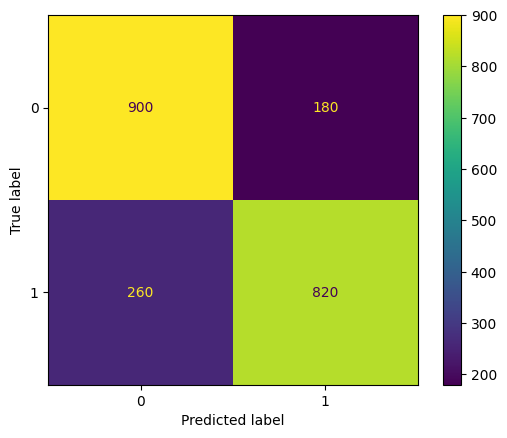

In [80]:
y_pred_arbol = arbol.predict(x_testDTC)

print("\n---- Rendimiento en TEST de Decision Tree Classifier ----")
print(f"Accuracy: {accuracy_score(y_testDTC, y_pred_arbol):.4f}")
print(classification_report(y_testDTC, y_pred_arbol))
print("Matriz de confusión:\n", confusion_matrix(y_testDTC, y_pred_arbol))

y_pred_train = arbol.predict(x_trainDTC)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainDTC, y_pred_train):.4f}")
ConfusionMatrixDisplay.from_predictions(y_testDTC,y_pred_arbol)

Después, realiza un análisis crítico y compara los modelos:

**¿Cuál modelo tuvo el mejor desempeño?**
*   Fue el Modelo Random Forest Classifier con un Accuracy de 0.8983

***¿Algún modelo presentó overfitting o underfitting? ***
*   Fue el Dummy Classifier, tuvo Underfitting


#📋 Interpretación y Conclusiones

##Analisis de la importancia de las variables

Con la evaluacion de tres modelos seleccionados : Dummy, Random Forest y el Decision Tree

Las siguientes variables mostraron ser altamente significativas.
*   Contract_Month-to-month
*   tenure
*   Contract_Two year
*   InternetService_Fiber optic
*   PaymentMethod_Electronic check


Por ejemplo, los clientes con contratos mes a mes o con internet de fibra óptica tienen una mayor tendencia a cancelar el servicio, mientras que aquellos con mayor antigüedad (tenure) o con contratos a largo plazo tienden a mantenerse.

El modelo Dummy, como línea base, confirmó que el problema de churn no puede resolverse con predicciones aleatorias, ya que no considera ninguna variable y se quedó en una accuracy del 50%. Esto refuerza la necesidad de modelos más complejos que realmente aprendan de los datos.

En el caso del Decision Tree, el análisis de las divisiones muestra que las variables mencionadas fueron utilizadas en los nodos superiores del árbol, indicando su alta capacidad para discriminar entre clientes que cancelan y los que no.

A su vez, el Random Forest, que se basa en múltiples árboles de decisión y calcula la importancia de cada variable según la reducción de impureza (índice de Gini), validó aún más esta selección. Variables como tenure, Contract_Month-to-month y InternetService_Fiber optic fueron consistentemente las más importantes para el modelo, lo que concuerda con el análisis de correlación inicial.

En conjunto, tanto el análisis estadístico como los modelos predictivos confirman que estas variables elegidas no solo son estadísticamente relevantes, sino también decisivas para el desempeño del modelo. Esto demuestra que la selección de variables fue adecuada y está alineada tanto con la teoría como con el aprendizaje de los modelos.

##Conclusion

El modelo de Random Forest fue el más eficaz para predecir el churn, alcanzando una precisión de 89.83% en el conjunto de prueba, y mostrando un equilibrio sólido entre la capacidad de aprendizaje y la generalización.

Importancia de las Variables según los Modelos Los modelos más avanzados (árbol de decisión y Random Forest) permiten medir la importancia relativa de cada variable. Este análisis, en conjunto con la correlación estadística observada en la fase exploratoria, confirma la relevancia de ciertas características:

*   tenure (tiempo de contrato): Es la variable con mayor peso. Los clientes con menor antigüedad son significativamente más propensos a cancelar.

*   Contract_Month-to-month: Este tipo de contrato está altamente asociado al churn. Los contratos mensuales facilitan la salida del cliente.

*   Contract_Two year: Su relación negativa con el churn sugiere que los contratos a largo plazo generan retención efectiva.

*   InternetService_Fiber optic: Este tipo de servicio se asocia con una mayor cancelación, posiblemente por problemas técnicos o costo elevado.

*   PaymentMethod_Electronic check: Este método de pago es un fuerte predictor de churn, tal vez por dificultades en el proceso o menor compromiso financiero.

*   OnlineSecurity, TechSupport, Dependents, Partner: Variables asociadas con mayor estabilidad, que cuando están presentes, tienden a reducir el riesgo de cancelación.

Estas variables no solo fueron identificadas como estadísticamente significativas en el análisis exploratorio, sino que también fueron seleccionadas por los modelos predictivos como factores críticos en las decisiones de clasificación.

A un futuro aplicare otros analisis como el KNN (K-Nearest Neighbors)